# Setting up

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Projects/1. Churn Prediction/

/content/drive/MyDrive/Projects/1. Churn Prediction


# Importing dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
DATASET = "output_cleaned_dataset.csv"

In [ ]:
df = pd.read_csv(DATASET)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Zip Code', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df.head()

,CustomerID,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,93225,2,9,None,Yes,Yes,One Year,Yes,Credit Card,65.6,974.81,0.00,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,91206,0,9,None,Yes,Yes,Month-to-Month,No,Credit Card,-4.0,648.61,38.33,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,92627,0,4,Offer E,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,415.45,0.00,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,94553,1,13,Offer D,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1599.51,0.00,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,93010,3,3,None,Yes,Yes,Month-to-Month,Yes,Credit Card,83.9,289.54,0.00,Churned,Dissatisfaction,Network reliability


# Cleaning dataset

## Dropping unnecessary columns

In [ ]:
df.drop(columns=["CustomerID", "Churn Category", "Churn Reason"], inplace=True)

In [ ]:
df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [ ]:
df = df[df["Customer Status"]!="Joined"]

In [ ]:
# unbalanced dataset - will deal with this later

df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [ ]:
df.shape

(6589, 17)

In [ ]:
df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Customer Status
0,Female,37,Yes,0,93225,2,9,None,Yes,Yes,One Year,Yes,Credit Card,65.6,974.81,0.00,Stayed
1,Male,46,No,0,91206,0,9,None,Yes,Yes,Month-to-Month,No,Credit Card,-4.0,648.61,38.33,Stayed
2,Male,50,No,0,92627,0,4,Offer E,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,415.45,0.00,Churned
3,Male,78,Yes,0,94553,1,13,Offer D,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1599.51,0.00,Churned
4,Female,75,Yes,0,93010,3,3,None,Yes,Yes,Month-to-Month,Yes,Credit Card,83.9,289.54,0.00,Churned


In [ ]:
print("Unique values of categorical columns\n")
for col in df.columns:
  if not df[col].dtype in ["int64", "float64"]: 
    print(f"{col}:")
    print(f"\tUniques: {df[col].unique()}")
    print(f"\tNumber of uniques: {df[col].nunique()}\n")

Unique values of categorical columns

Gender:
	Uniques: ['Female' 'Male']
	Number of uniques: 2

Married:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Offer:
	Uniques: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
	Number of uniques: 6

Phone Service:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Internet Service:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Contract:
	Uniques: ['One Year' 'Month-to-Month' 'Two Year']
	Number of uniques: 3

Paperless Billing:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Payment Method:
	Uniques: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
	Number of uniques: 3

Customer Status:
	Uniques: ['Stayed' 'Churned']
	Number of uniques: 2



## Label Encoding

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder
cols = ["Gender", "Married", "Phone Service", "Internet Service", "Paperless Billing"]
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

<ipython-input-154-6acb7e2de05b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Customer Status
0,0,37,1,0,93225,2,9,None,1,1,One Year,1,Credit Card,65.6,974.81,0.00,Stayed
1,1,46,0,0,91206,0,9,None,1,1,Month-to-Month,0,Credit Card,-4.0,648.61,38.33,Stayed
2,1,50,0,0,92627,0,4,Offer E,1,1,Month-to-Month,1,Bank Withdrawal,73.9,415.45,0.00,Churned
3,1,78,1,0,94553,1,13,Offer D,1,1,Month-to-Month,1,Bank Withdrawal,98.0,1599.51,0.00,Churned
4,0,75,1,0,93010,3,3,None,1,1,Month-to-Month,1,Credit Card,83.9,289.54,0.00,Churned


## Splitting dataset into X and y

In [ ]:
X = df.iloc[:, :-1]
y = df["Customer Status"]

In [ ]:
X

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds
0,0,37,1,0,93225,2,9,None,1,1,One Year,1,Credit Card,65.60,974.81,0.00
1,1,46,0,0,91206,0,9,None,1,1,Month-to-Month,0,Credit Card,-4.00,648.61,38.33
2,1,50,0,0,92627,0,4,Offer E,1,1,Month-to-Month,1,Bank Withdrawal,73.90,415.45,0.00
3,1,78,1,0,94553,1,13,Offer D,1,1,Month-to-Month,1,Bank Withdrawal,98.00,1599.51,0.00
4,0,75,1,0,93010,3,3,None,1,1,Month-to-Month,1,Credit Card,83.90,289.54,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,36,0,0,92028,0,4,None,1,0,Month-to-Month,0,Bank Withdrawal,20.95,93.54,0.00
7038,0,20,0,0,91941,0,13,Offer D,1,1,One Year,0,Credit Card,55.15,1349.74,0.00
7039,1,40,1,0,95367,1,22,Offer D,1,1,Month-to-Month,1,Bank Withdrawal,85.10,2230.10,0.00
7041,1,21,1,0,92075,5,67,Offer A,1,1,Two Year,0,Credit Card,67.85,4769.69,0.00


## Encoding dependent variable

In [ ]:
y

0        Stayed
1        Stayed
2       Churned
3       Churned
4       Churned
         ...   
7037    Churned
7038     Stayed
7039    Churned
7041     Stayed
7042     Stayed
Name: Customer Status, Length: 6589, dtype: object

In [ ]:
# encoding dependent variable
# (Stayed = 0, Churned = 1)

y = y.apply(lambda x: 0 if x == "Stayed" else 1)

In [ ]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7037    1
7038    0
7039    1
7041    0
7042    0
Name: Customer Status, Length: 6589, dtype: int64

In [ ]:
y.unique()

array([0, 1])

## One hot encoding

In [ ]:
# one hot encoding

X = pd.get_dummies(X)

In [ ]:
X.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Internet Service,Paperless Billing,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,37,1,0,93225,2,9,1,1,1,...,0,0,0,0,0,1,0,0,1,0
1,1,46,0,0,91206,0,9,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,50,0,0,92627,0,4,1,1,1,...,0,0,0,1,1,0,0,1,0,0
3,1,78,1,0,94553,1,13,1,1,1,...,0,0,1,0,1,0,0,1,0,0
4,0,75,1,0,93010,3,3,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Internet Service', 'Paperless Billing', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Offer_None', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dtype='object')

In [ ]:
X.dtypes

Gender                              int64
Age                                 int64
Married                             int64
Number of Dependents                int64
Zip Code                            int64
Number of Referrals                 int64
Tenure in Months                    int64
Phone Service                       int64
Internet Service                    int64
Paperless Billing                   int64
Monthly Charge                    float64
Total Charges                     float64
Total Refunds                     float64
Offer_None                          uint8
Offer_Offer A                       uint8
Offer_Offer B                       uint8
Offer_Offer C                       uint8
Offer_Offer D                       uint8
Offer_Offer E                       uint8
Contract_Month-to-Month             uint8
Contract_One Year                   uint8
Contract_Two Year                   uint8
Payment Method_Bank Withdrawal      uint8
Payment Method_Credit Card        

In [ ]:
X.shape

(6589, 25)

In [ ]:
y.shape

(6589,)

## Splitting dataset into train, test

In [ ]:
# splitting into train (60%), test (20%) and val (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
X_train.shape

(5930, 25)

In [ ]:
y_train.shape

(5930,)

In [ ]:
X_test.shape

(329, 25)

In [ ]:
y_test.shape

(329,)

In [ ]:
X_val.shape

(330, 25)

In [ ]:
y_val.shape

(330,)

## Feature scaling

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
X_train

array([[ 0.98993263,  0.07637485,  0.99428278, ..., -1.14537803,
         1.27888841, -0.23685382],
       [-1.01016975, -1.17080054,  0.99428278, ..., -1.14537803,
        -0.78192905,  4.22201336],
       [ 0.98993263,  1.73927536,  0.99428278, ...,  0.87307419,
        -0.78192905, -0.23685382],
       ...,
       [-1.01016975, -0.87385402,  0.99428278, ..., -1.14537803,
         1.27888841, -0.23685382],
       [ 0.98993263,  0.13576415, -1.00575009, ..., -1.14537803,
         1.27888841, -0.23685382],
       [ 0.98993263,  0.55148928, -1.00575009, ...,  0.87307419,
        -0.78192905, -0.23685382]])

In [ ]:
X_test

array([[ 0.98993263, -0.27996098, -1.00575009, ..., -1.14537803,
         1.27888841, -0.23685382],
       [ 0.98993263,  1.62049675, -1.00575009, ...,  0.87307419,
        -0.78192905, -0.23685382],
       [-1.01016975,  0.67026788, -1.00575009, ..., -1.14537803,
         1.27888841, -0.23685382],
       ...,
       [ 0.98993263,  0.37332136,  0.99428278, ...,  0.87307419,
        -0.78192905, -0.23685382],
       [-1.01016975, -1.64591497, -1.00575009, ..., -1.14537803,
         1.27888841, -0.23685382],
       [-1.01016975,  0.9672144 , -1.00575009, ...,  0.87307419,
        -0.78192905, -0.23685382]])

In [ ]:
X_val

array([[ 0.98993263,  1.73927536,  0.99428278, ...,  0.87307419,
        -0.78192905, -0.23685382],
       [-1.01016975, -0.16118237,  0.99428278, ..., -1.14537803,
         1.27888841, -0.23685382],
       [ 0.98993263, -1.17080054,  0.99428278, ...,  0.87307419,
        -0.78192905, -0.23685382],
       ...,
       [-1.01016975, -0.87385402,  0.99428278, ...,  0.87307419,
        -0.78192905, -0.23685382],
       [ 0.98993263, -1.34896845, -1.00575009, ...,  0.87307419,
        -0.78192905, -0.23685382],
       [-1.01016975,  0.9078251 , -1.00575009, ...,  0.87307419,
        -0.78192905, -0.23685382]])

## Balance training set

In [ ]:
X_train.shape

(5930, 25)

In [ ]:
y_train.shape

(5930,)

In [ ]:
y_train.value_counts()

0    4231
1    1699
Name: Customer Status, dtype: int64

In [ ]:
y_train.value_counts()

0    4231
1    1699
Name: Customer Status, dtype: int64

In [ ]:
y_train

4780    0
6594    0
1696    1
3160    0
4557    1
       ..
1927    0
4921    1
4175    0
6420    0
6550    1
Name: Customer Status, Length: 5930, dtype: int64

In [ ]:
# using PCA to visualise unbalanced data points

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train)
pca_df = pd.DataFrame({
    "y": y_train,
    "feature1": pca_data[:, 0],
    "feature2": pca_data[:, 1],
})
pca_df.reset_index(inplace=True, drop=True)

px.scatter(pca_df, x="feature1", y="feature2", color="y", symbol="y")

As u can see, currently there are way more dots pertaining to the "0" class (stayed) than the "1" class (churned). Let's fix this by balancing that data!

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(8462, 25)

In [ ]:
y_resampled.shape

(8462,)

In [ ]:
y_resampled.value_counts() # balanced!!!

0    4231
1    4231
Name: Customer Status, dtype: int64

In [ ]:
# using PCA to visualise balanced data points

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_resampled)
pca_df = pd.DataFrame({
    "y": y_resampled,
    "feature1": pca_data[:, 0],
    "feature2": pca_data[:, 1],
})
pca_df.reset_index(inplace=True, drop=True)

px.scatter(pca_df, x="feature1", y="feature2", color="y", symbol="y")

Now there is an even number of observations for each class. Hopefully this improves training!

# Training

## Building model

In [ ]:
# building the model

import tensorflow
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

model = Sequential(layers=[
    Dense(16, activation="relu", input_shape=(25,)),
    BatchNormalization(),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    BatchNormalization(),
    BatchNormalization(),
    Dense(10, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

## Compiling and saving

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.002)

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpointer = tensorflow.keras.callbacks.ModelCheckpoint(
    "Trial 1: model3_weights.hdf5", 
    monitor="val_loss", 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=True
)

earlystopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=1
)

In [ ]:
with open("Trial 1: model3.json", "w") as json_file:
  json_file.write(model.to_json())

## Fitting

In [ ]:
# keep in mind how we are using X_resampled and y_resampled instead of X_train
# and y_train

history = model.fit(
    X_resampled, 
    y_resampled, 
    batch_size=8, 
    validation_data=(X_val, y_val), 
    verbose=1,
    callbacks=[checkpointer, earlystopping],
    shuffle=True,
    epochs=200
)

Epoch 1/200
1056/1058 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.7521
Epoch 1: val_loss improved from inf to 0.47568, saving model to model3_weights.hdf5
1058/1058 [==============================] - 14s 8ms/step - loss: 0.5079 - accuracy: 0.7523 - val_loss: 0.4757 - val_accuracy: 0.7788
Epoch 2/200
1055/1058 [============================>.] - ETA: 0s - loss: 0.4487 - accuracy: 0.7962
Epoch 2: val_loss improved from 0.47568 to 0.44379, saving model to model3_weights.hdf5
1058/1058 [==============================] - 8s 8ms/step - loss: 0.4486 - accuracy: 0.7964 - val_loss: 0.4438 - val_accuracy: 0.7848
Epoch 3/200
1053/1058 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.8104
Epoch 3: val_loss improved from 0.44379 to 0.43746, saving model to model3_weights.hdf5
1058/1058 [==============================] - 9s 8ms/step - loss: 0.4258 - accuracy: 0.8106 - val_loss: 0.4375 - val_accuracy: 0.7758
Epoch 4/200
1053/1058 [====================

# Analysing

In [ ]:
training_acc = history.history["accuracy"]
training_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

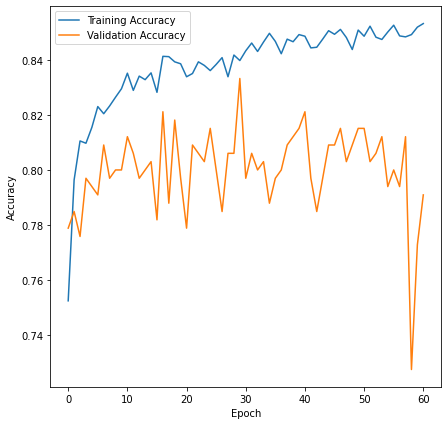

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(history.epoch, training_acc, label="Training Accuracy")
plt.plot(history.epoch, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

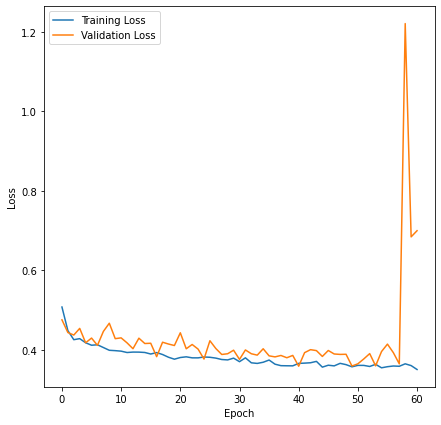

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(history.epoch, training_loss, label="Training Loss")
plt.plot(history.epoch, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
y_pred = np.round(model.predict(X_test))

11/11 [==============================] - 0s 2ms/step


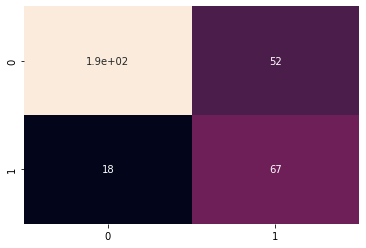

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.7872340425531915

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       244
           1       0.56      0.79      0.66        85

    accuracy                           0.79       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.82      0.79      0.80       329



In [ ]:
stayed_precision = precision_score(y_test, y_pred, labels=[0, 1], pos_label=0)

In [ ]:
churned_precision = precision_score(y_test, y_pred, labels=[0, 1], pos_label=1)

In [ ]:
stayed_recall = recall_score(y_test, y_pred, labels=[0, 1], pos_label=0)

In [ ]:
churned_recall = recall_score(y_test, y_pred, labels=[0, 1], pos_label=1)

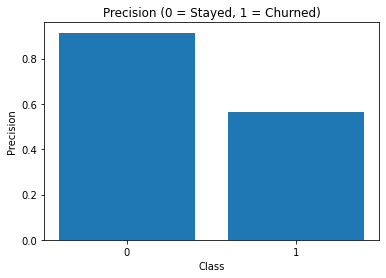

In [ ]:
plt.bar(["0", "1"], [stayed_precision, churned_precision])
plt.xlabel("Class")
plt.ylabel("Precision")
plt.title("Precision (0 = Stayed, 1 = Churned)")
plt.show()

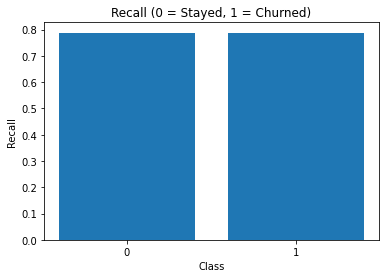

In [ ]:
plt.bar(["0", "1"], [stayed_recall, churned_recall])
plt.xlabel("Class")
plt.ylabel("Recall")
plt.title("Recall (0 = Stayed, 1 = Churned)")
plt.show()

Well... that didn't go as planned. I tried various model network structures, different train test splits and even different sampling methods, but the best accuracy I received was around 83%.

In the next notebook, I will use XGBoost instead of neural nets to see if I can get a better accuracy. If that doesn't work, I think i might have to do some more feature engineering.

